<a href="https://colab.research.google.com/github/jjfj2011/Movie_Analysis/blob/main/Movie_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

# **1. Configuración del Ambiente**

In [ ]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**

##**2.1 Cargando las bases de datos**

In [ ]:
df_title_basics = dd.read_csv(r'/content/drive/MyDrive/Bootcamp Xperience/2024-06 Junio/DataSet/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [ ]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
645107,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [ ]:
df_title_ratings = dd.read_csv(r'/content/drive/MyDrive/Bootcamp Xperience/2024-06 Junio/DataSet/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787
5,tt0000006,5.10,187
6,tt0000007,5.40,872
7,tt0000008,5.40,2202
8,tt0000009,5.40,212
9,tt0000010,6.80,7594


In [ ]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510389,tt10872600,8.20,886954


In [ ]:
df_tmdb = dd.read_csv(r'/content/drive/MyDrive/Bootcamp Xperience/2024-06 Junio/DataSet/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


##**2.2 Tratamiento de Datos**

In [ ]:
df_title_basics.shape[0].compute()

10843834

In [ ]:
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

In [ ]:
def preprocesamiento():
  global df_title_basics, df_title_ratings, df_tmdb, df_tmdb_title

  # Convertir a dataframes de pandas
  df_title_basics = df_title_basics.compute()
  df_title_ratings = df_title_ratings.compute()
  df_tmdb = df_tmdb.compute()

  # Eliminar algunas columnas
  df_tmdb_title = df_tmdb.drop(columns=['id', 'vote_count', 'status', 'runtime', 'adult', 'backdrop_path', 'homepage', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'keywords'])
  # Eliminar algunas columnas
  df_title_basics = df_title_basics.drop(columns=['primaryTitle', 'endYear'])
  # Eliminar algunas columnas
  df_tmdb = df_tmdb.drop(columns=['id', 'title', 'vote_count', 'status', 'runtime', 'adult', 'backdrop_path', 'homepage', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'production_companies', 'spoken_languages', 'keywords'])

  # df_tmdb_title.info()

  # Elimina los registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero.
  df_tmdb_title = df_tmdb_title[(df_tmdb_title['budget'] > 0) & (df_tmdb_title['revenue'] > 0)]

  # Eliminar registros con valores nulos o '\\N'
  df_tmdb_title = df_tmdb_title.replace('\\N', np.nan)
  df_tmdb_title = df_tmdb_title.dropna()

  # Eliminamos duplicados en la columna 'imdb_id' y duplicados de registros
  df_tmdb_title.drop_duplicates(subset='imdb_id', inplace=True)
  df_tmdb_title.drop_duplicates(inplace=True)

  # Crear la columna 'roi'
  df_tmdb_title['roi'] = (df_tmdb_title['revenue'] - df_tmdb_title['budget']) / df_tmdb_title['budget']

  # Convertir columnas al tipo de dato correcto
  df_tmdb_title['vote_average'] = df_tmdb_title['vote_average'].astype('int')
  df_tmdb_title['release_date'] = pd.to_datetime(df_tmdb_title['release_date'], format='%Y-%m-%d', errors='coerce')

  # df_tmdb_title.info()

  # Elimina los registros de df_title_basics diferentes de 'tvSeries','movie'.
  df_title_basics = df_title_basics[df_title_basics['titleType'].isin(['tvSeries', 'movie'])]

  # Elimina los registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero.
  df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]

  # Crear la columna 'roi'
  df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

  # Eliminar outliers de la columna 'roi' de df_tmdb
  Q1 = df_tmdb['roi'].quantile(0.25)
  Q3 = df_tmdb['roi'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_tmdb = df_tmdb[(df_tmdb['roi'] >= lower_bound) & (df_tmdb['roi'] <= upper_bound)]

  # Eliminar registros con valores nulos o '\\N' de los 3 dataframes
  df_title_basics = df_title_basics.replace('\\N', np.nan)
  df_title_basics = df_title_basics.dropna()
  df_title_ratings = df_title_ratings.replace('\\N', np.nan)
  df_title_ratings = df_title_ratings.dropna()
  df_tmdb = df_tmdb.replace('\\N', np.nan)
  df_tmdb = df_tmdb.dropna()

  # Eliminar duplicados (llaves: 'tconst','imdb_id') de los 3 dataframes
  df_title_basics = df_title_basics.drop_duplicates(subset='tconst')
  df_title_ratings = df_title_ratings.drop_duplicates(subset='tconst')
  df_tmdb = df_tmdb.drop_duplicates(subset='imdb_id')

  # Convertir columnas al tipo de dato correcto
  df_title_basics['isAdult'] = df_title_basics['isAdult'].astype('int')
  df_title_basics['startYear'] = df_title_basics['startYear'].astype('int')
  df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype(int)
  df_tmdb['vote_average'] = df_tmdb['vote_average'].astype('int')
  df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
preprocesamiento()
print(df_title_basics.info())
print('-------------')
print(df_title_ratings.info())
print('-------------')
print(df_tmdb.info())
print('-------------')
print(df_tmdb_title.info())

<ipython-input-10-869e200dbbae>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']


<class 'pandas.core.frame.DataFrame'>
Index: 493133 entries, 8 to 784328
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          493133 non-null  string
 1   titleType       493133 non-null  string
 2   originalTitle   493133 non-null  string
 3   isAdult         493133 non-null  int64 
 4   startYear       493133 non-null  int64 
 5   runtimeMinutes  493133 non-null  int64 
 6   genres          493133 non-null  string
dtypes: int64(3), string(4)
memory usage: 43.8 MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.3 MB
None
------------

In [ ]:
df_title_basics.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"


In [ ]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787


In [ ]:
df_tmdb.head()

,vote_average,release_date,revenue,budget,imdb_id,genres,production_countries,roi
0,8,2010-07-15,825532764,160000000,tt1375666,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,8,2014-11-05,701729206,165000000,tt0816692,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25
2,8,2008-07-16,1004558444,185000000,tt0468569,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",4.43
4,7,2012-04-25,1518815515,220000000,tt0848228,"Science Fiction, Action, Adventure",United States of America,5.90
6,8,2018-04-25,2052415039,300000000,tt4154756,"Adventure, Action, Science Fiction",United States of America,5.84


##**2.3 Análisis Exploratorio (EDA)**

In [ ]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,493133.00,493133.00,493133.00
mean,0.01,1998.23,81.62
std,0.11,25.26,145.90
min,0.00,1894.00,1.00
25%,0.00,1985.00,60.00
50%,0.00,2009.00,84.00
75%,0.00,2017.00,98.00
max,1.00,2029.00,59460.00


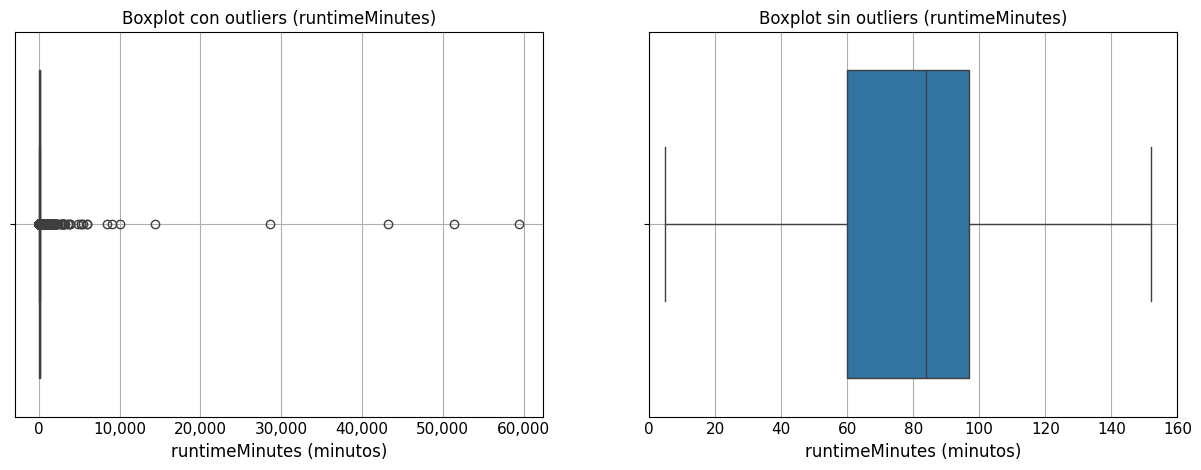

In [ ]:
# Trabajamos los Outliers de 'runtimeMinutes'
q1 = df_title_basics['runtimeMinutes'].quantile(0.25)
q3 = df_title_basics['runtimeMinutes'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

#df_title_basics_2 = df_title_basics[(df_title_basics['runtimeMinutes'] > lower) & (df_title_basics['runtimeMinutes'] < upper)]
df_title_basics_2 = df_title_basics[(df_title_basics['runtimeMinutes'] >= lower) & (df_title_basics['runtimeMinutes'] <= upper)]

fig,ax = plt.subplots(1,2, figsize=(15,5))

# PRIMER GRÁFICO
sns.boxplot(df_title_basics['runtimeMinutes'], orient='h', ax=ax[0])
ax[0].grid(True)
ax[0].set_title('Boxplot con outliers (runtimeMinutes)', fontsize=12)
ax[0].set_xlabel('runtimeMinutes (minutos)', fontsize=12)
ax[0].tick_params(axis='x', labelsize=11)
ax[0].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X

# Formato de separador de miles en el eje Y del primer gráfico
ax[0].get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# SEGUNDO GRÁFICO
sns.boxplot(x=df_title_basics_2['runtimeMinutes'], orient='h', showfliers=False, ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Boxplot sin outliers (runtimeMinutes)', fontsize=12)
ax[1].set_xlabel('runtimeMinutes (minutos)', fontsize=12)
ax[1].tick_params(axis='x', labelsize=11)
ax[1].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X
ax[1].set_xlim(0,160)


plt.show()

In [ ]:
# Duración promedio de un contenido. Se eliminaron los Outliers
df_title_basics_2['runtimeMinutes'].mean()

78.3049120611345

En el primer Boxplot se visualiza que existen películas y series con grandes minutos de duración. Esto es casi imposible de que suceda, debido a que un contenido tiene una duración promedio de 78 minutos como se visualiza en el segundo Boxplot (sin outliers), que tiene una distribución más cercana a la realidad

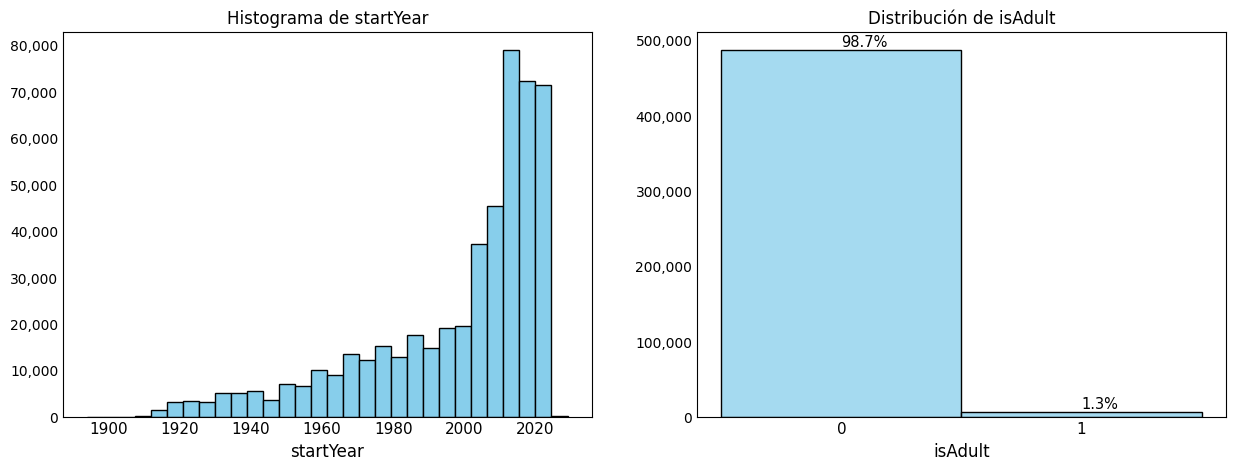

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# PRIMER GRÁFICO
ax[0].hist(df_title_basics['startYear'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de startYear', fontsize=12)
ax[0].set_xlabel('startYear', fontsize=12)
ax[0].tick_params(axis='x', labelsize=11) # Aumentamos el tamaño de los valores en el eje X
ax[0].tick_params(axis='y', length=0) # Eliminar las rayitas de los valores del eje Y
ax[0].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X

# Formato de separador de miles en el eje Y del primer gráfico
ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# SEGUNDO GRÁFICO
sns.histplot(df_title_basics['isAdult'], color='skyblue', ax=ax[1], bins=[-0.5,0.5,1.5], edgecolor='black')
ax[1].set_title('Distribución de isAdult', fontsize=12)
# Ajustar los ticks del eje X para mostrar solo 0 y 1
ax[1].set_xticks([0,1])
ax[1].set_xlabel('isAdult', fontsize=12)
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', labelsize=11) # Aumentamos el tamaño de los valores en el eje X
ax[1].tick_params(axis='y', length=0) # Eliminar las rayitas de los valores del eje Y
ax[1].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X
# Formato de separador de miles en el eje Y del primer gráfico
ax[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p:format(int(x),',')))

# Calculamos los porcentajes
total = len(df_title_basics['isAdult'])
counts = df_title_basics['isAdult'].value_counts()
porcentaje = (counts/total)*100
# Añadimos los porcentajes encima de cada barra
for i,p in enumerate(porcentaje):
  ax[1].text(i, counts.iloc[i]+5000, f'{p:.1f}%', fontsize=10.5)

plt.show()

Se visualiza que a partir 1990 en adelante, hay un aumento considerable en la creación de contenido (películas y series). Esto nos ayuda a que debemos de filtrar la data a partir de ese año (1990).

Y con respecto al segundo gráfico, se puede apreciar que la mayoría del contenido producido está apta para todo público. Solo un mínimo de porcentaje (1.3%) está consideraba para el público adulto

In [ ]:
df_title_ratings.describe()

,averageRating,numVotes
count,1446041.00,1446041.00
mean,6.96,1032.07
std,1.38,17697.86
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2904305.00


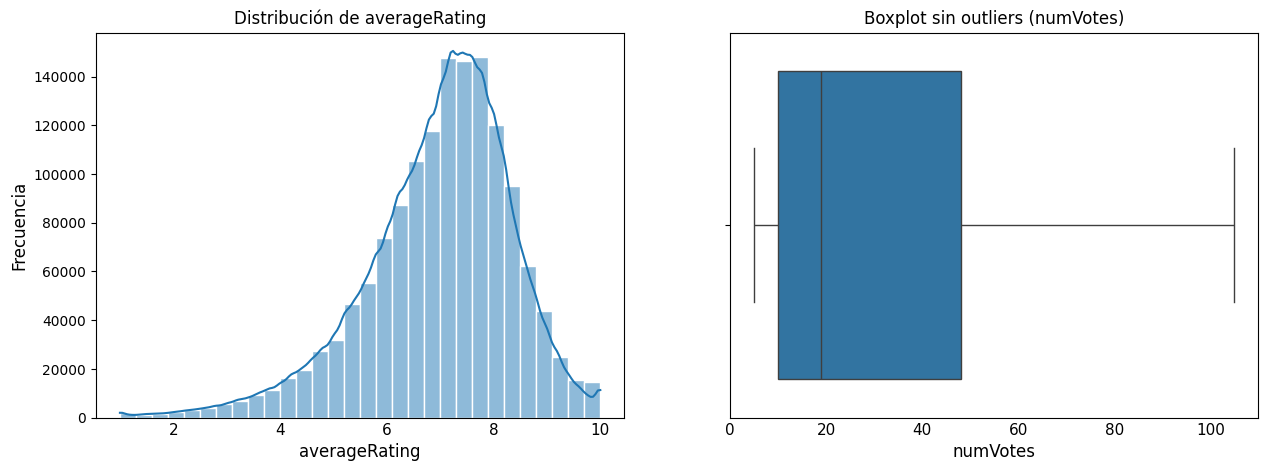

In [ ]:
# trabajamos los Outliers de df_title_ratings['numVotes']
q1 = df_title_ratings['numVotes'].quantile(0.25)
q3 = df_title_ratings['numVotes'].quantile(0.75)
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

df_title_ratings_2 = df_title_ratings[(df_title_ratings['numVotes'] >= lower) & (df_title_ratings['numVotes'] <= upper)]

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# PRIMER GRÁFICO
sns.histplot(df_title_ratings['averageRating'], ax=ax[0], bins=30, kde=True, edgecolor='white')
ax[0].set_title('Distribución de averageRating', fontsize=12)
ax[0].set_xlabel('averageRating', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)
ax[0].tick_params(axis='x', labelsize=11)
ax[0].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X

# SEGUNDO GRÁFICO
# ax[1].boxplot(df_title_ratings_2['numVotes'], vert=False)
sns.boxplot(df_title_ratings_2['numVotes'], orient='h', showfliers=False, ax=ax[1])
ax[1].set_title('Boxplot sin outliers (numVotes)', fontsize=12)
ax[1].tick_params(axis='x', labelsize=11)
ax[1].set_xlabel('numVotes', fontsize=12)
ax[1].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X


plt.show()

Se puede apreciar que los consumidores dan un puntaje dentro del rango de 6 a 8 puntos. Además, el número de votos máximo es de 45 aproximadamente

In [ ]:
df_tmdb.describe()

,vote_average,release_date,revenue,budget,roi
count,9098.00,9098,9098.00,9098.00,9098.00
mean,5.71,2002-02-28 02:06:18.280940928,58422398.10,24898927.34,1.02
min,0.00,1914-04-25 00:00:00,1.00,1.00,-1.00
25%,5.00,1996-01-12 00:00:00,1453317.25,2500000.00,-0.43
50%,6.00,2007-04-13 00:00:00,11000000.00,10000000.00,0.47
75%,6.00,2014-09-06 18:00:00,49742506.00,30000000.00,1.94
max,10.00,2024-07-23 00:00:00,2800000000.00,460000000.00,7.21
std,1.58,NaN,138819997.89,38882019.34,1.86


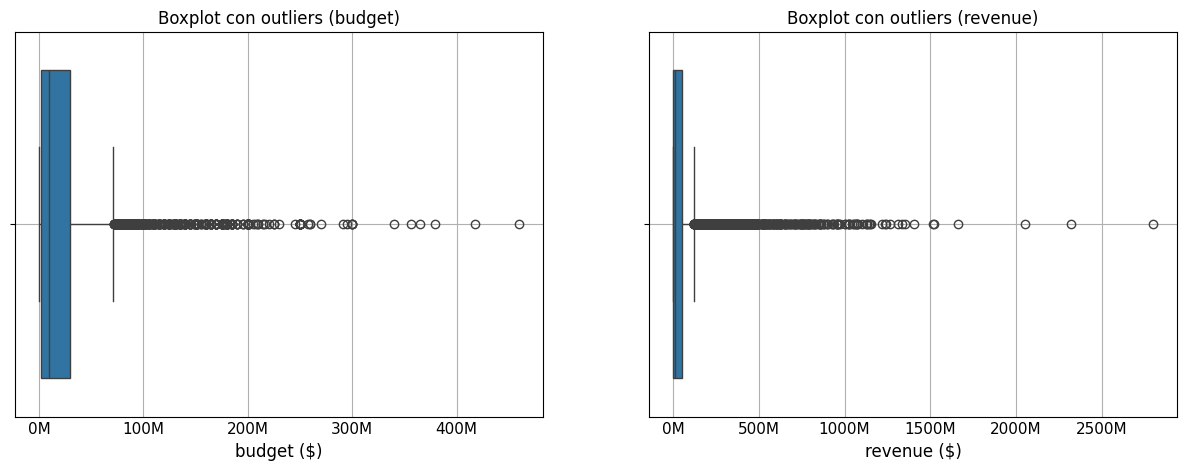

In [ ]:
def millones(x, pos):
    'El argumento pos no es usado en este caso'
    return f'{x*1e-6:.0f}M'

fig,ax =plt.subplots(1,2,figsize=(15,5))

# PRIMER GRÁFICO
sns.boxplot(df_tmdb['budget'], orient='h', ax=ax[0])
ax[0].set_title('Boxplot con outliers (budget)', fontsize=12)
ax[0].set_xlabel('budget ($)', fontsize=12)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(millones))
ax[0].grid(True)
ax[0].tick_params(axis='x', labelsize=11)
ax[0].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X


# SEGUNDO GRÁFICO
sns.boxplot(df_tmdb['revenue'], orient='h', ax=ax[1])
ax[1].set_title('Boxplot con outliers (revenue)', fontsize=12)
ax[1].set_xlabel('revenue ($)', fontsize=12)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(millones))
ax[1].grid(True)
ax[1].tick_params(axis='x', labelsize=11)
ax[1].tick_params(axis='x', length=0) # Eliminar las rayitas de los valores del eje X


plt.show()

Se puede apreciar que algunos contenidos tienen montos elevados de inversión y ganancia con respecto a otros contenidos

In [ ]:
df_tmdb_title.head()

,title,vote_average,release_date,revenue,budget,imdb_id,genres,production_companies,production_countries,spoken_languages,roi
0,Inception,8,2010-07-15,825532764,160000000,tt1375666,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",4.16
1,Interstellar,8,2014-11-05,701729206,165000000,tt0816692,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,3.25
2,The Dark Knight,8,2008-07-16,1004558444,185000000,tt0468569,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",4.43
3,Avatar,7,2009-12-15,2923706026,237000000,tt0499549,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",11.34
4,The Avengers,7,2012-04-25,1518815515,220000000,tt0848228,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",5.90


##**2.4 Adicionales**

In [ ]:
# Filtramos df_title_basics en el campo 'startYear' desde 1990 en adelante
df_title_basics = df_title_basics[df_title_basics["startYear"] >= 1990]

# Filtramos df_tmdb en el campo 'startYear' desde 1990 hasta 2024
df_tmdb=df_tmdb[df_tmdb['release_date'].dt.year.between(1990,2024)]

# Filtramos df_tmdb_title en el campo 'startYear' desde 1990 hasta 2024
df_tmdb_title=df_tmdb_title[df_tmdb_title['release_date'].dt.year.between(1990,2024)]

# Voto promedio mayor a cero
df_title_ratings = df_title_ratings[(df_title_ratings.averageRating > 0)]

# Filtramos contenidos entre 15 y 180 minutos
df_title_basics = df_title_basics[(df_title_basics.runtimeMinutes.between(15,180))]

#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

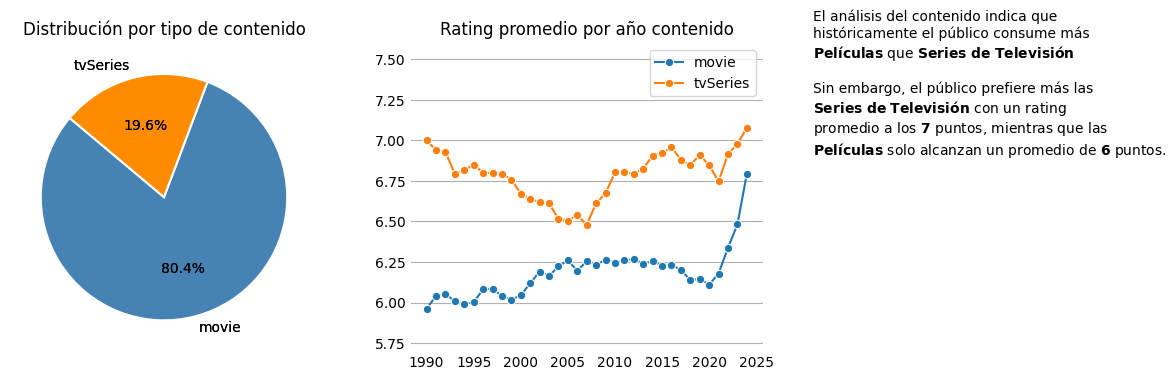

In [ ]:
def pregunta_1():

  # Definición de variables globales
  global df_title_basics,df_title_ratings,df_tmdb

  # Filtramos df_title_basics en el campo 'startYear' desde 1990 en adelante
  # df_title_basics = df_title_basics[df_title_basics["startYear"] >= 1990]

  # Prepara un conteo por 'titleType' del dataframe df_title_basics
  title_type_counts = df_title_basics['titleType'].value_counts()

  # Preparación de datos para el gráfico de líneas
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))

  for title_type in title_type_counts.index:
    # Filtrar el subset de datos por tipo de título
    subset = df_title_basics[df_title_basics['titleType'] == title_type]

    # Merge con df_title_ratings y cálculo del promedio de averageRating por startYear
    avg_rating_by_year = subset.merge(df_title_ratings, on='tconst').groupby('startYear')['averageRating'].mean()

    # Capturamos los promedios de "movie" y "tvSeries"
    if title_type == "movie":
      avg_movie = round(avg_rating_by_year.mean())
    else:
      avg_tvSeries = round(avg_rating_by_year.mean())

    #Colores personalizados
    colors = ['steelblue', 'darkorange']

    # Gráfico de pizza
    ax[0].pie(title_type_counts, labels=title_type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor':'white', 'linewidth':1.5}, colors=colors)

    ax[0].set_title('Distribución por tipo de contenido')

    # Gráfico de líneas
    sns.lineplot(data=avg_rating_by_year, marker='o', label=title_type, ax=ax[1])
    ax[1].set_title('Rating promedio por año contenido')
    # ax[1].set_xlim(1990,2025)
    ax[1].set_ylim(5.7,7.6)
    ax[1].set_ylabel("")
    ax[1].set_xlabel("")
    ax[1].legend(loc='best')
    ax[1].grid(True, axis='y')
    sns.despine(ax=ax[1], left=True, bottom=True)
    ax[1].tick_params(axis='both', which='both', length=0)


  # TEXTO
  texto_1 = "$\mathbf{" + "Películas" + "}$"
  texto_2 = "$\mathbf{" + str(avg_movie) + "}$"
  texto_3 = "$\mathbf{" + "Series" + "}$" + " " + "$\mathbf{" + "de" + "}$" + " " + "$\mathbf{" + "Televisión" + "}$"
  texto_4 = "$\mathbf{" + str(avg_tvSeries) + "}$"

  texto = "El análisis del contenido indica que \nhistóricamente el público consume más \n{} que {} \n\nSin embargo, el público prefiere más las \n{} con un rating \npromedio a los {} puntos, mientras que las \n{} solo alcanzan un promedio de {} puntos.".format(texto_1, texto_3, texto_3, texto_4, texto_1, texto_2)

  plt.figtext(0.95, 0.6, texto)

  plt.show()


pregunta_1()

##**Pregunta 2: ¿Cual es el rating promedio por género?**

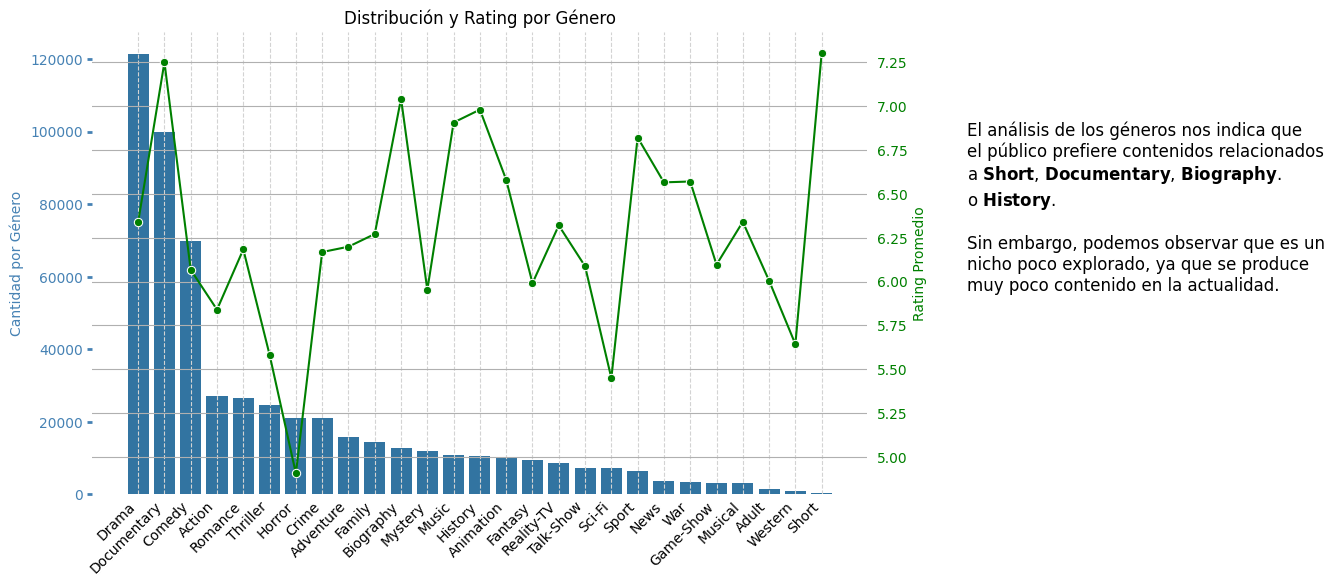

In [ ]:
def pregunta_2():

  # Definición de variables globales
  global df_title_basics,df_title_ratings,df_tmdb

  # Creamos los múltiples valores en valores individuales que contiene la columna 'genres' en df_title_basics
  df_title_basics_expanded = df_title_basics.assign(genre=df_title_basics['genres'].str.split(',')).explode('genre')
  # df_title_basics_expanded.head()

  # Hacemos un merge entre df_title_basics_expanded y df_title_ratings
  df_merged = df_title_basics_expanded.merge(df_title_ratings, on='tconst', how='inner')

  # Agrupamos por 'genre' y calculamos el promedio de la columna averageRating
  df_genre_stats = df_merged.groupby('genre').agg(avg_rating=('averageRating','mean'), movie_count=('tconst','count')).reset_index()
  # df_genre_stats

  # Ordenamos por la columna 'movie_count' en 'df_genre_stats'
  df_genre_stats = df_genre_stats.sort_values(by='movie_count', ascending=False)
  # df_genre_stats

  # Obtenemos solo los géneros
  genre_order = df_title_basics_expanded['genre'].value_counts().index
  # genre_order

  # Creamos la figura y los ejes
  fig, ax1 = plt.subplots(figsize=(10,6))

  # PRIMER GRÁFICO: Gráfico de barras
  sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=genre_order)
  ax1.set_title('Distribución y Rating por Género')
  ax1.set_xlabel('')
  ax1.set_ylabel('Cantidad por Género', color='steelblue')
  # Ajustar el color de las ticks en el eje Y
  ax1.tick_params(axis='y', colors='steelblue')
  # Agregamos el grid vertical
  ax1.grid(True, axis='x', color='lightgray', linestyle='--')
  # Eliminamos las rayitas de los valores del eje X
  ax1.tick_params(axis='x', length=0)
  # Eliminamos las rayitas de los valores del eje Y
  ax1.tick_params(axis='y', width=2)

  # Eliminar el marco de ax1
  for spine in ax1.spines.values():
    spine.set_visible(False)

  # Formato del eje X
  ax1.set_xticks(range(len(genre_order)))
  ax1.set_xticklabels(genre_order, rotation=45, ha='right') # Rotar 45 grados y alinear a la derecha

  # Ajustar el espaciado entre los ticks del eje Y secundario
  ax1.yaxis.set_major_locator(plt.MultipleLocator(20000))

  # SEGUNDO GRÁFICO: Gráfico de líneas
  ax2 = ax1.twinx()

  # Aseguramos que los géneros de 'df_genre_stats' se muestren con el mismo orden que el gráfico de barras
  df_genre_stats = df_genre_stats.set_index('genre').loc[genre_order].reset_index()

  # Gráfico de líneas
  sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', ax=ax2, color='g', marker='o')
  ax2.set_ylabel('Rating Promedio', color='g')
  # Ajustar el color de las ticks en el eje Y
  ax2.tick_params(axis='y', colors='g')
  # Eliminamos las rayitas de los valores del eje Y
  ax2.tick_params(axis='y', width=0)
  # Agregamos el grid horizontal
  ax2.grid(True, axis='y')

  # Eliminar el marco de ax2
  for spine in ax2.spines.values():
    spine.set_visible(False)

  # Ajustar el espaciado entre los ticks del eje Y secundario
  ax2.yaxis.set_major_locator(plt.MultipleLocator(0.25))

  # TEXTO
  top_genres = df_genre_stats.sort_values(by='avg_rating', ascending=False).head(4)
  texto_1 = "$\mathbf{" + top_genres['genre'].iloc[0] + "}$"
  texto_2 = "$\mathbf{" + top_genres['genre'].iloc[1] + "}$"
  texto_3 = "$\mathbf{" + top_genres['genre'].iloc[2] + "}$"
  texto_4 = "$\mathbf{" + top_genres['genre'].iloc[3] + "}$"

  texto = "El análisis de los géneros nos indica que \nel público prefiere contenidos relacionados \na {}, {}, {}. \no {}. \n\nSin embargo, podemos observar que es un \nnicho poco explorado, ya que se produce \nmuy poco contenido en la actualidad.".format(texto_1, texto_2, texto_3, texto_4)

  plt.figtext(1, 0.45, texto, fontsize=12)

  plt.show()


pregunta_2()

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

<ipython-input-63-4ca40aff1d59>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)


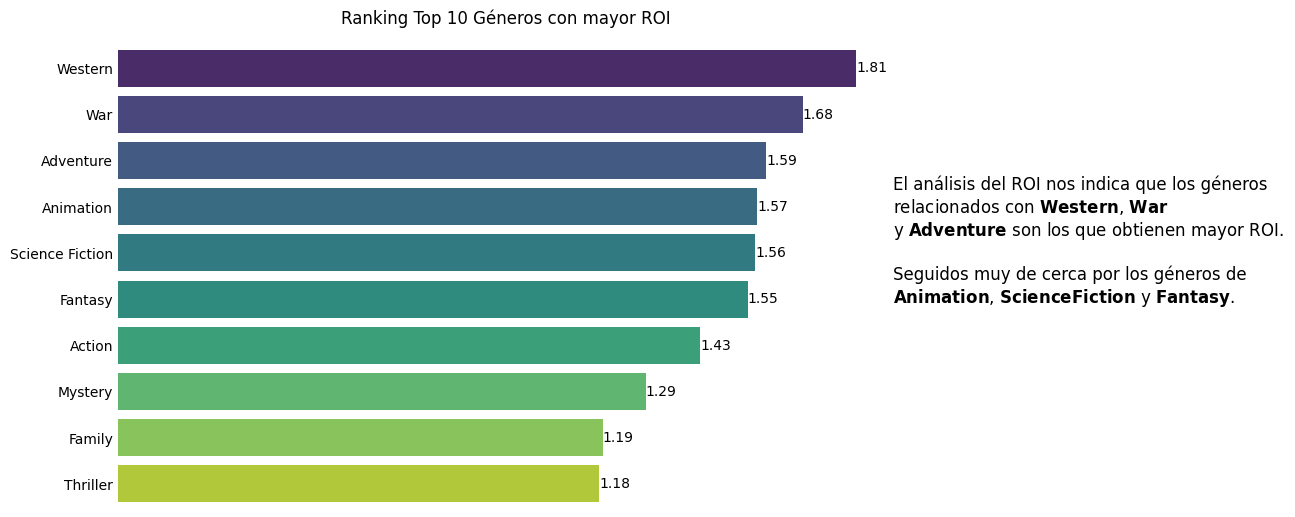

In [ ]:
def pregunta_3():

  # Definición de variables globales
  global df_title_basics,df_title_ratings,df_tmdb

  # 1. Preparación de los datos:

  # Filtramos df_tmdb para 'budget' y 'revenue' mayores a 500000
  df_tmdb=df_tmdb[(df_tmdb['budget']>500000) & (df_tmdb['revenue']>500000)]

  # Separamos los múltiples valores en valores individuales que contiene la columna 'genres' en df_tmdb
  df_tmdb_expanded = df_tmdb.assign(genre=df_tmdb['genres'].str.split(',').explode('genre').str.strip()).explode('genre')

  # Agrupamos por 'genre' y calculamos el promedio de la columna 'roi'
  df_genre_roi = df_tmdb_expanded.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)

  # 2. Visualización:
  # Crear el gráfico de barras verticales
  fig, ax = plt.subplots(figsize=(10, 6))

  # Grafico de barras
  sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)

  plt.title('Ranking Top 10 Géneros con mayor ROI', pad=15, fontsize=12)

  # Agregar los valores a la derecha de cada barra
  for index,value in enumerate(df_genre_roi.values):
    ax.text(value, index, f'{value:.2f}', color='black', va='center')

  # Eliminar el marco del gráfico
  sns.despine(ax=ax, left=True, bottom=True)
  # Eliminar las rayitas del eje X
  ax.tick_params(axis='x', which='both', length=0)
  # Eliminar las rayitas del eje y
  ax.tick_params(axis='y', which='both', length=0)
  # Eliminar los valores del eje X
  ax.set_xticklabels([])
  # Eliminar título del eje Y
  ax.set_ylabel('')

  # Textos
  texto_1 = "$\mathbf{" + df_genre_roi.index[0] + "}$"
  texto_2 = "$\mathbf{" +   df_genre_roi.index[1] + "}$"
  texto_3 =  "$\mathbf{" + df_genre_roi.index[2] + "}$"
  texto_4 = "$\mathbf{" + df_genre_roi.index[3] + "}$"
  texto_5 = "$\mathbf{" + df_genre_roi.index[4] + "}$"
  texto_6 = "$\mathbf{" + df_genre_roi.index[5] + "}$"

  texto = "El análisis del ROI nos indica que los géneros \nrelacionados con {}, {} \ny {} son los que obtienen mayor ROI. \n\nSeguidos muy de cerca por los géneros de \n{}, {} y {}.".format(texto_1, texto_2, texto_3, texto_4, texto_5, texto_6)

  plt.figtext(0.9, 0.45, texto, fontsize=12)

  plt.show()

pregunta_3()

##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [ ]:
def pregunta_4():

  # Definición de variables globales
  global df_title_basics,df_title_ratings,df_tmdb

  # Separamos los múltiples valores en valores individuales que contiene la columna 'production_countries' en df_tmdb
  df_tmdb_exploded_countries = df_tmdb.assign(production_countries=df_tmdb['production_countries'].str.split(',')).explode('production_countries').copy()
  df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

  # Agrupamos por production_countries y calculamos el promedio de 'roi'
  df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi':'mean', 'production_countries':'count'}).rename(columns={'production_countries':'count'})

  # Actualizamos df_plot
  df_plot = df_plot.sort_values(by='count', ascending=True)
  df_plot = df_plot.tail(13)

  # 3. Crear posiciones fijas en una cuadrícula
  num_countries = len(df_plot)
  grid_size = int(np.ceil(np.sqrt(num_countries)))
  df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
  df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

  # 4. Crear el gráfico de burbujas
  import plotly.express as px

  fig = px.scatter(
      df_plot, x='x', y='y',
      size='count', color='roi',
      text=df_plot.index,
      color_continuous_scale='blues',
      size_max=110,
      custom_data=['roi'],
      hover_data={'roi': True, 'count': False, 'x': False, 'y': False}
  )

  fig.update_traces(hovertemplate='%{text}<br>ROI: %{customdata[0]:.2f}')

  fig.update_layout(
      plot_bgcolor='white',
      paper_bgcolor='white',
      xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, title=''),
      yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, title=''),
      title={
          'text': 'Países con mayor producción de contenido',
          'x': 0.5,
          'y': 0.95,
          'xanchor': 'center',
          'yanchor': 'top',
          'font': {'size': 24}
      },
      width=750,
      height=650
  )

  fig.show()

pregunta_4()

Podemos apreciar que USA es el país con mayor producción de contenido. Además USA muestra el mayor Retorno de Inversión (ROI) con respecto a los demás países.

Adicional a esto, podemos apreciar que India, Japón y China son países atractivos para producir contenido y obtener un buen retorno de inversión

Todo lo contrario a lo mencionado anteriormente, es que no se recomienda producir en el país de Bélgica, a menos que las productoras lo vean como un nuevo desafío para crear nuevos contenidos.

##**Pregunta 5: ¿Qué empresa productora obtiene mayor ROI y cuánto fue su presupuesto?**

<ipython-input-65-3ed292936ae8>:42: UserWarning:

FixedFormatter should only be used together with FixedLocator



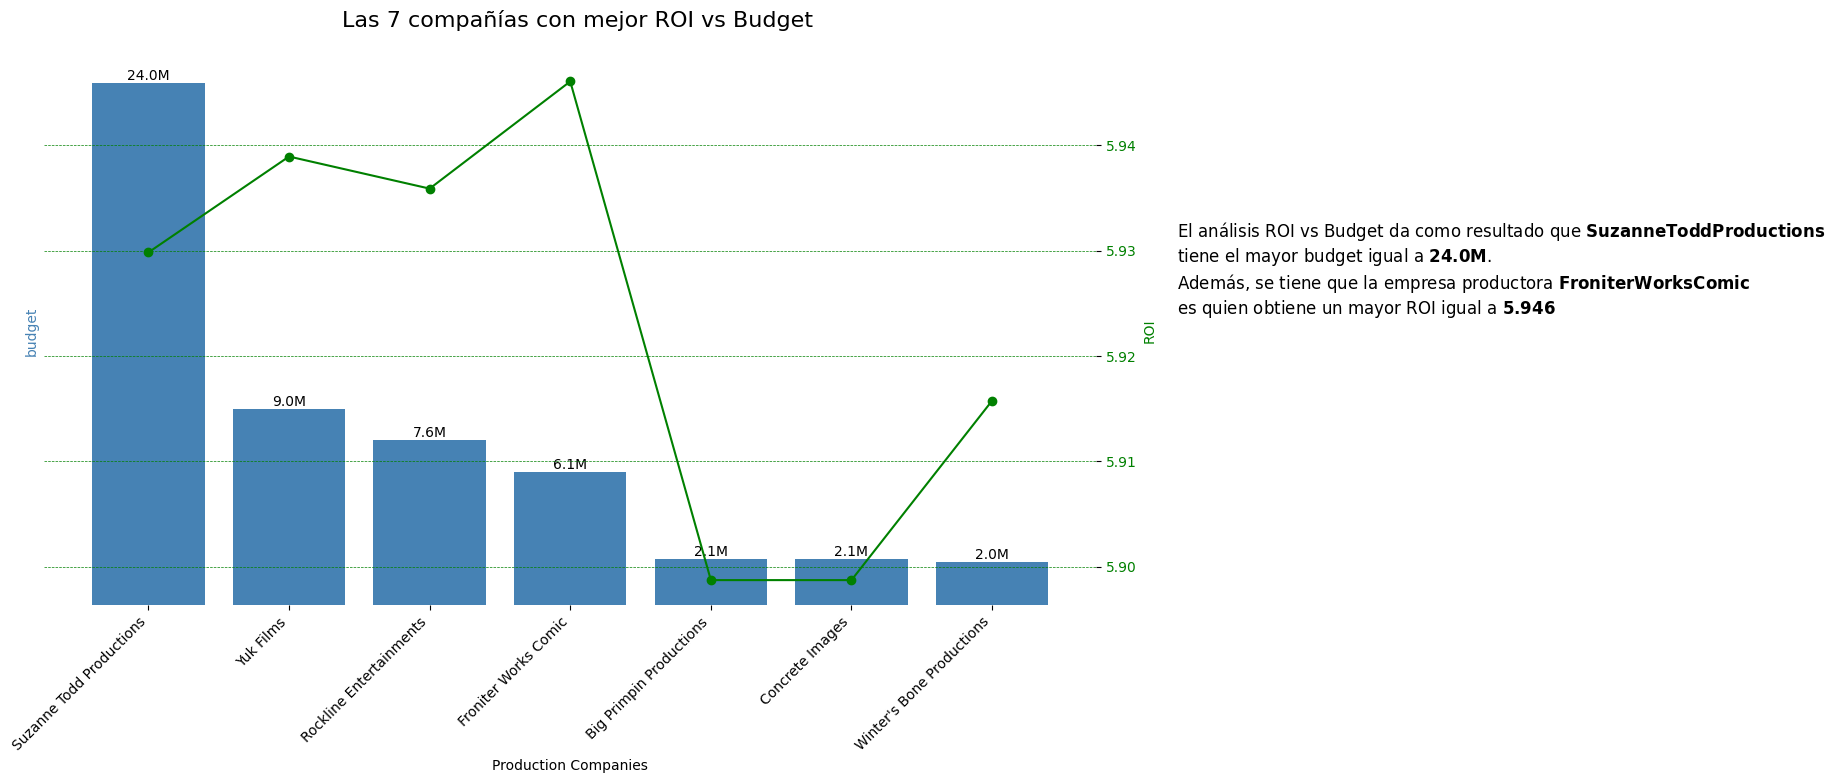

In [ ]:
def pregunta_5():

  # Definición de variables globales
  global df_title_basics, df_title_ratings, df_tmdb, df_tmdb_title

  # Filtramos df_tmdb_title para 'budget' y 'revenue' mayores a 500000
  df_tmdb_title=df_tmdb_title[(df_tmdb_title['budget']>500000) & (df_tmdb_title['revenue']>500000)]

  # Separar las compañías de producción en filas individuales
  df_companies = df_tmdb_title[['production_companies', 'roi', 'budget', 'revenue']].copy()
  df_companies['production_companies'] = df_companies['production_companies'].str.split(', ')

  # Explode para separar las listas en filas individuales
  df_exploded = df_companies.explode('production_companies')

  # Agrupar por compañía de producción y calcular el promedio de 'roi' y 'budget'
  df_grouped = df_exploded.groupby('production_companies').agg({'roi': 'mean', 'budget': 'mean', 'revenue':'mean'}).reset_index()

  # Trabajamos los Outliers
  q1 = df_grouped['roi'].quantile(0.25)
  q3 = df_grouped['roi'].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  df_grouped_2 = df_grouped[(df_grouped['roi'] >= lower) & (df_grouped['roi'] <= upper)]

  # Seleccionar las 7 mejores compañías por ROI
  top_7_companies = df_grouped_2.nlargest(7, 'roi').reset_index()
  top_7_companies = top_7_companies.sort_values(by='budget', ascending=False)
  top_7_companies = top_7_companies.reset_index()
  # print(top_7_companies[['production_companies', 'roi', 'budget', 'revenue']])

  # Crear el gráfico combinado
  fig, ax1 = plt.subplots(figsize=(12, 8))

  # Gráfico de barras para el budget
  ax1.bar(top_7_companies['production_companies'], top_7_companies['budget'], color='steelblue', label='budget')
  ax1.set_xlabel('Production Companies')
  ax1.set_ylabel('budget', color='steelblue')
  ax1.tick_params(axis='y', labelcolor='steelblue')
  ax1.set_xticklabels(top_7_companies['production_companies'], rotation=45, ha='right')

  # Eliminar rayitas y ticks del eje Y principal
  ax1.tick_params(axis='y', left=False, labelleft=False)
  # Eliminar las rayitas del eje Y
  ax1.tick_params(axis='y', which='both', length=0)

  # Añadir valores en cada barra
  bars = ax1.bar(top_7_companies['production_companies'], top_7_companies['budget'], color='steelblue', label='budget')
  for bar in bars:
      height = bar.get_height()
      ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e6:.1f}M', ha='center', va='bottom', color='black', fontsize=10)

  # Crear un segundo eje para el ROI
  ax2 = ax1.twinx()
  ax2.plot(top_7_companies['production_companies'], top_7_companies['roi'], color='green', marker='o', label='ROI')
  ax2.set_ylabel('ROI', color='green')
  ax2.tick_params(axis='y', labelcolor='green')

  # Títulos y leyendas
  fig.suptitle('Las 7 compañías con mejor ROI vs Budget', fontsize=16)

  # Añadir grid horizontal solo para el eje Y secundario
  ax2.grid(axis='y', color='green', linestyle='--', linewidth=0.5)

  # Eliminar el marco del gráfico
  for spine in ax1.spines.values():
      spine.set_visible(False)
  for spine in ax2.spines.values():
      spine.set_visible(False)

  # Ajustar márgenes para acercar el título con el gráfico
  fig.tight_layout(pad=1.5)

  # Formato de millones
  def formato_millones(number):
      return f'{number / 1e6:.1f}M'

  # Textos
  texto_1 = "$\mathbf{" + top_7_companies.loc[top_7_companies['budget'].idxmax(), 'production_companies'] + "}$"
  texto_2 = "$\mathbf{" + str(formato_millones(top_7_companies['budget'].max())) + "}$"
  texto_3 =  "$\mathbf{" + top_7_companies.loc[top_7_companies['roi'].idxmax(), 'production_companies'] + "}$"
  texto_4 = "$\mathbf{" + str(round(top_7_companies['roi'].max(),3)) + "}$"

  # Texto
  texto = "El análisis ROI vs Budget da como resultado que {} \ntiene el mayor budget igual a {}. \nAdemás, se tiene que la empresa productora {} \nes quien obtiene un mayor ROI igual a {}".format(texto_1, texto_2, texto_3, texto_4)

  plt.figtext(1.0, 0.60, texto, fontsize=12)

  plt.show()


pregunta_5()

# **Conclusiones**

Se ha realizado un análisis descriptivo con respecto a los contenidos de películas y series, considerando la información desde 1990 en adelante y se tiene lo siguiente:
- Históricamente las películas han sido los productos que más se han creado en comparación al contenido de Series. Esto tiene sentido debido a que la producción masiva de series han ido en aumento recién con el ingreso de los medios Streaming
- Se tiene que existen 4 géneros que han sido de mayor producción para los clientes: Drama, Documentary, Comedy y Action. Sin embargo los clientes tienen una mayor preferencia por otros géneros como Biography y History, además del género Documentary
- Un análisis ROI de los contenidos producidos nos da como resultado que los géneros Western, War y Adventure son muy atractivos para que las productoras obtengan una alta ganancia con respecto a la inversión realizada.
- USA ha sido el país con mayor producción de contenido y además es quien genera un mayor retorno de inversión (ROI). Adicional a esto, India, Japón y China se perfilan como países atractivos para producir contenido y obtener buenas ganancias
- Por último, si se desea invertir y obtener altas ganancias, la productora Froniter Works Comic es una buena elección, ya que lidera el mercado con respecto a las otras productoras. Por otro lado, actualmente la productora Suzanne Todd Productions es la preferida para invertir y crear nuevos contenidos, debido al alto monto de inversión que ha conseguido durante estos años